In [35]:
unsup_categories_annotation_folder = '/content/drive/MyDrive/coffeAI-detector-first-gen/unsupervised_5_label'
sup_categories_annotation_folder = '/content/drive/MyDrive/coffeAI-detector-first-gen/labels'


In [36]:
import pandas as pd
import os, numpy as np 


In [37]:
def create_df_correlate_scales(unsupervised_labels_folder, supervised_labels_folder):
    unsup_labels, sup_labels = [],[]

    for file_ in os.listdir(unsupervised_labels_folder):
        uns_ = unsupervised_labels_folder + '/' + file_
        sup_ = supervised_labels_folder + '/' + file_

        with open(uns_) as f, open(sup_) as r:
            uns_lines, sup_lines = sum(1 for line in f), sum(1 for line in r)
            f.seek(0) # return pointer to start
            r.seek(0) # return pointer to start

            if uns_lines == sup_lines:
                for line in f:
                    unsup_labels.append(line[0])
                for line in r:
                    sup_labels.append(line[0])
        
    df = pd.DataFrame({'Unsupervised Labels': unsup_labels,
                       'Supervised Labels': sup_labels})

    return df


        

In [38]:
df = create_df_correlate_scales(unsup_categories_annotation_folder,
                                sup_categories_annotation_folder)

In [39]:
df.head()

,Unsupervised Labels,Supervised Labels
0,1,2
1,1,2
2,1,2
3,4,3
4,1,3


In [40]:
df

,Unsupervised Labels,Supervised Labels
0,1,2
1,1,2
2,1,2
3,4,3
4,1,3
...,...,...
42492,1,2
42493,1,2
42494,1,2
42495,1,2


In [41]:
supervised_labels_convertion = {'0':'cherry',
                                '1':'dry',
                                '2':'green',
                                '3':'green_yellow',
                                '4':'raisin'}

# from classes.txt (export from label studio)

In [42]:
supervised_labels_str = [] 

for i in df['Supervised Labels']:
    supervised_labels_str.append(supervised_labels_convertion[i])

In [43]:
df['Supervised Labels'] = supervised_labels_str

In [44]:
df.head()

,Unsupervised Labels,Supervised Labels
0,1,green
1,1,green
2,1,green
3,4,green_yellow
4,1,green_yellow


In [50]:
crosstab = pd.crosstab(df['Unsupervised Labels'], df['Supervised Labels'], normalize = 'index')
crosstab

Supervised Labels,cherry,dry,green,green_yellow,raisin
Unsupervised Labels,,,,,
0,0.408313,0.002586,0.000398,0.005569,0.583134
1,0.002290,0.000998,0.839843,0.156281,0.000587
2,0.001447,0.000085,0.490725,0.507658,0.000085
3,0.533524,0.035093,0.013980,0.248217,0.169187
4,0.048216,0.128255,0.582449,0.106461,0.134619


<Axes: xlabel='Supervised Labels', ylabel='Unsupervised Labels'>

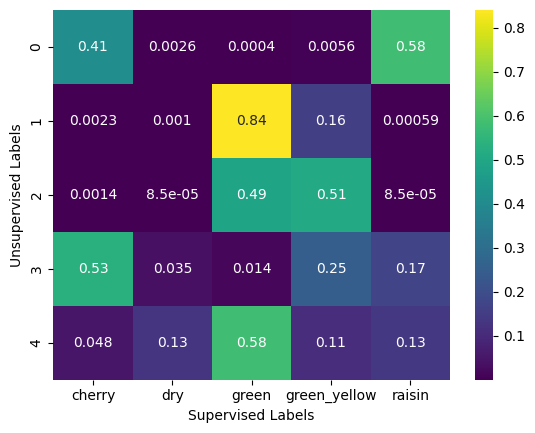

In [54]:
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(crosstab, cmap='viridis', annot=True)